<a href="https://colab.research.google.com/github/ollihansen90/zeugs/blob/main/MariesTransforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

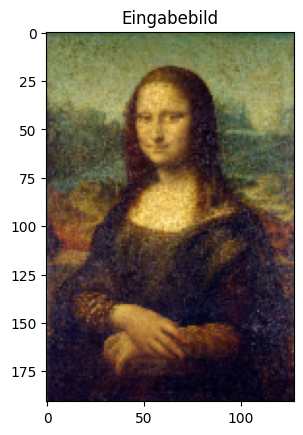

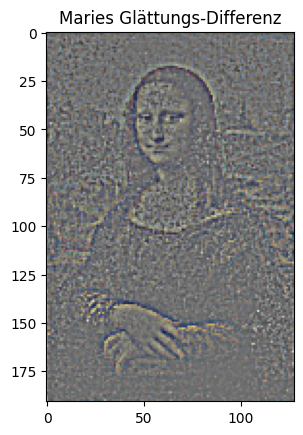

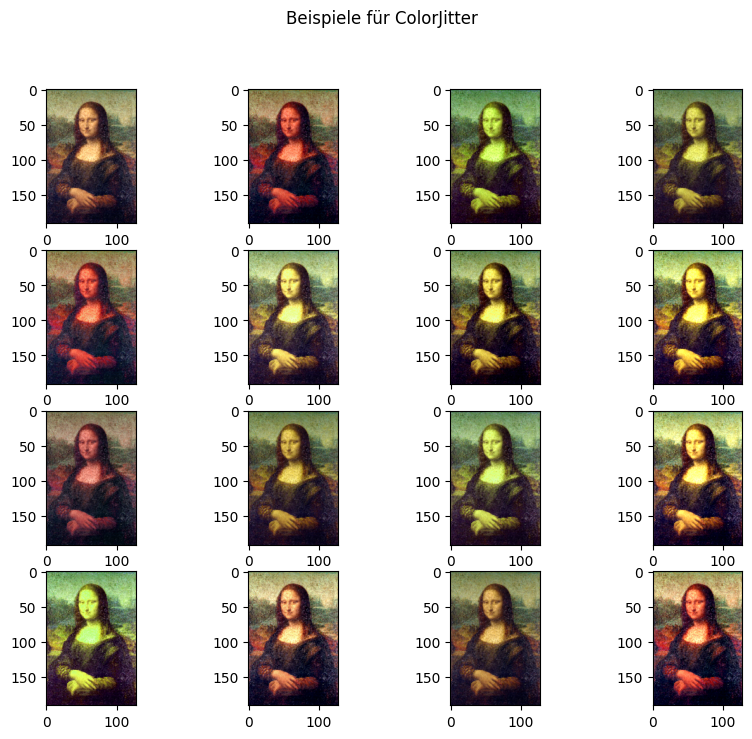

In [21]:
import torch
from torchvision.transforms import ToTensor, GaussianBlur, ColorJitter, Compose
import matplotlib.pyplot as plt
from skimage.io import imread

image_url = "https://cdn.pariscityvision.com/library/image/5449.jpg"
img = ToTensor()(imread(image_url).astype(float)[::8,::8])#@np.array([0.2989, 0.5870, 0.114])
img = GaussianBlur([7,7],0.5)(img)

def tonumpy(img):
    img -= torch.min(img)
    img /= torch.max(img)
    return img.transpose(0,1).transpose(1,2).numpy()

# ----------- Den hier kannst du einfach in dein Skript einbauen ---------------
class MariesGlaettungsDifferenz():
    def __init__(self, kernel_size=[3,3], sigma=1):
        # sigma muss zwischen 0.1 und 2 liegen
        # kernel_size nicht "zu groß" (wird sonst langsam)
        self.smooth = GaussianBlur(kernel_size=kernel_size, sigma=sigma)

    def __call__(self, x):
        # entweder x-smooth oder smooth-x, da musst du mal gucken 
        # (dem Netzwerk sollte das aber egal sein)
        return x-self.smooth(x)

# Hier wird die Transformation initialisiert (das kommt hinterher in das Compose)
t_marie = MariesGlaettungsDifferenz(kernel_size=[5,5], sigma=2)
# ------------------------------------------------------------------------------

# Zum Testen von ColorJitter, ich nehme immer die hier:
#     brightness=0.4, 
#     contrast=0.3, 
#     saturation=0.2, 
#     hue=0.1
t_color = ColorJitter(
                    brightness=0.4, 
                    contrast=0.3, 
                    saturation=0.2, 
                    hue=0.1)

plt.figure()
plt.imshow(tonumpy(img))
plt.title("Eingabebild")
plt.show()

plt.figure()
plt.imshow(tonumpy(t_marie(img)))
plt.title("Maries Glättungs-Differenz")
plt.show()

plt.figure(figsize=[10,8])
plt.suptitle("Beispiele für ColorJitter")
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(tonumpy(t_color(img)))
plt.show()